# Inductive bias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import sys 
from importlib import reload
sys.path.append("../")
import E1_Functions as func

# Define a discrete color palette with a specified number of colors
#sns.set_palette(sns.color_palette("muted", n_colors=10))  # or use another color map and adjust `n_colors`
custom_palette = ["#FFB347", "#779ECB", "#77DD77", "#FF6961", "#CB99C9", "#FDFD96", "#AEC6CF"]
costum_palette_pairs = ['#ffb347', '#ffcc84', '#ffe6c2', 
                        '#779ecb', '#a4bedc', '#d2dfee', 
                        '#77dd77', '#a4e8a4', '#d2f4d2', 
                        '#ff6961', '#ff9b96', '#ffcdca', 
                        '#cb99c9', '#dcbbdb', '#eedded', 
                        '#fdfd96', '#fefeb9', '#fefedc',
                        '#aec6cf', '#c9d9df', '#e4ecef']

sns.set_palette(custom_palette)
colors = sns.color_palette()
colors_pairs = sns.color_palette(costum_palette_pairs) #("tab20c")

# set title font size
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Enable LaTeX font rendering
#plt.rcParams.update({
#    "text.usetex": True,            # Use LaTeX for all text
#    "font.family": "serif",         # Set the font family to serif (LaTeX default)
#    "font.serif": ["Computer Modern"]  # Use Computer Modern font (LaTeX default font)
#})


In [2]:
save_results = False
save_plots = False

In [7]:
reload(func);

# Example

OLD:
- Dataset consists of 3 num_samples x [x, y] points. 
- The number of training samples i train_points, the number for validation and testing is 100 each. 
- The data is generated from a sine function with some noise. 
- The task is to train a model to predict the sine function.

Questions:
- Should validation and testing be done on the same data? Does not make a difference, since it is generated from the same distribution.
- Should validation and testing be done on the sine function without noise? 

NEW:
- Dataset consists of num_train x [x, y] points for training.
- Validation and testing are identical and is the sine function without noise.

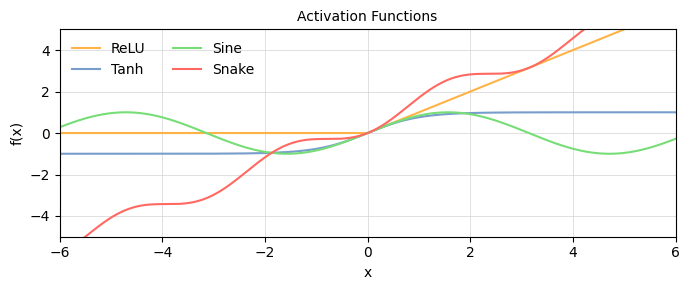

In [8]:
# plot a ReLU and Sine activation function

x = np.linspace(-2*np.pi, 2*np.pi, 1000)
relu = np.maximum(x, 0)
sine = np.sin(x)
tanh = np.tanh(x)
snake = x+np.sin(x)**2

plt.figure(figsize=(7, 3))
plt.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)
plt.plot(x, relu, label='ReLU', color=colors[0])
plt.plot(x, tanh, label='Tanh', color=colors[1])
plt.plot(x, sine, label='Sine', color=colors[2])
plt.plot(x, snake, label='Snake', color=colors[3])
plt.title('Activation Functions')
plt.legend(loc='upper left', frameon=False, ncols=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-2*np.pi, 2*np.pi)
plt.xlim(-6, 6)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

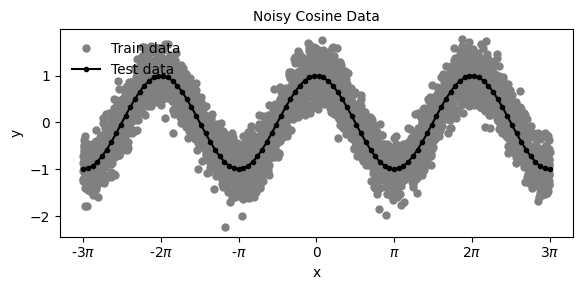

In [19]:
# GENERATE DATA
reload(func);

# Parameters for sine wave dataset
num_points = 5000 #40 #50 #100
noise_std = 0.3

n_waves = 3 #5.5

# Generate data
train_x_array, train_y_array, test_x_array, test_y_array = func.generate_data(num_points, noise_std, n_waves, shifted=False)
_, _, test_x, test_y = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)

# Plot an example sample
func.plot_data_example(train_x_array, train_y_array, test_x_array, test_y_array)

In [6]:
reload(func);

In [12]:
# TRAIN MODEL
input_size, hidden_sizes, output_size = 1, [64, 64], 1
batch_size = 25
print_every = 500
lr = 0.01

# Define model parameters
num_points = 50
num_epochs = 100 #50  #100


# Data
train_x_array, train_y_array, test_x_array, test_y_array = func.generate_data(num_points, noise_std, n_waves, shifted=False)

# Convert data to tensors and create dataloaders
train_x, train_y, test_x, test_y = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)

###### MLP ######
ReLuMLP = func.ReLUMLP(input_size, hidden_sizes, output_size)
model_ReLUMLP, train_losses_MLP, val_losses_MLP = func.train_model(ReLuMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)


###### SineMLP ######
SineMLP = func.SineMLP(input_size, hidden_sizes, output_size)
model_SineMLP, train_losses_SineMLP, val_losses_SineMLP = func.train_model(SineMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)


###### TanhMLP ######
TanhMLP = func.TanhMLP(input_size, hidden_sizes, output_size)
model_TanhMLP, train_losses_TanhMLP, val_losses_TanhMLP = func.train_model(TanhMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

###### SnakeMLP ######
SnakeMLP = func.SnakeMLP(input_size, hidden_sizes, output_size)
model_SnakeMLP, train_losses_SnakeMLP, val_losses_SnakeMLP = func.train_model(SnakeMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

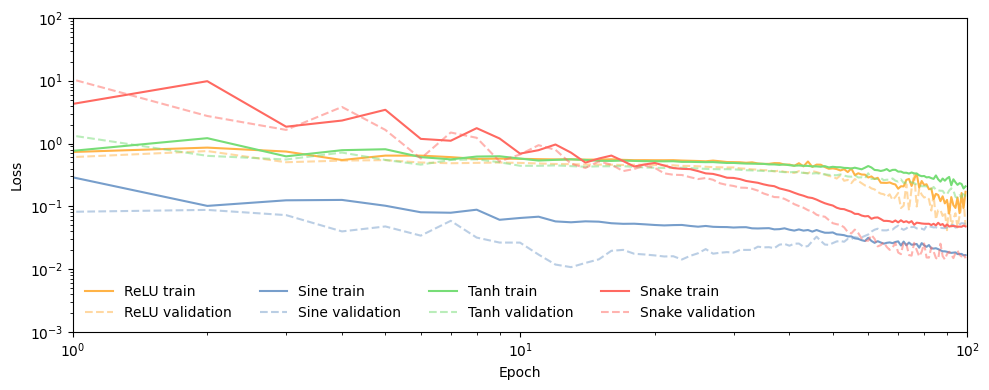

In [13]:
# Plot losses
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.plot(train_losses_MLP, label='ReLU train', color=colors[0])
ax.plot(val_losses_MLP, label='ReLU validation', ls = '--', color=colors[0], alpha=0.5)

ax.plot(train_losses_SineMLP, label='Sine train', color=colors[1])
ax.plot(val_losses_SineMLP, label='Sine validation', ls = '--', color=colors[1], alpha=0.5)

ax.plot(train_losses_TanhMLP, label='Tanh train', color=colors[2])
ax.plot(val_losses_TanhMLP, label='Tanh validation', ls = '--', color=colors[2], alpha=0.5)

ax.plot(train_losses_SnakeMLP, label='Snake train', color=colors[3])
ax.plot(val_losses_SnakeMLP, label='Snake validation', ls = '--', color=colors[3], alpha=0.5)

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower left', frameon=False, ncols=4)
ax.set_xlim(1, num_epochs)
ax.set_ylim(1e-3, 1e2)
plt.tight_layout()
#func.plot_losses(train_losses, val_losses, 'MLP')

(-1.5, 1.5)

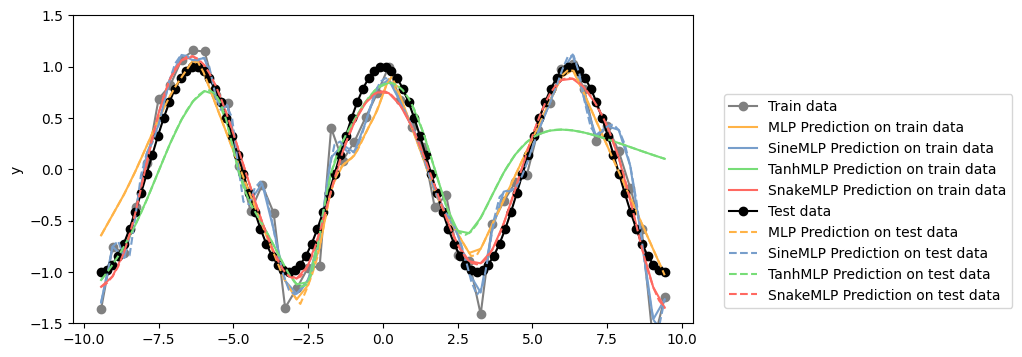

In [14]:
# plot results
from matplotlib.gridspec import GridSpec

model_ReLUMLP.eval()
model_SineMLP.eval()
model_TanhMLP.eval()
model_SnakeMLP.eval()

# Plot predictions
with torch.no_grad():
    train_pred_ReLUMLP = model_ReLUMLP(train_x).numpy().squeeze()
    test_pred_ReLUMLP = model_ReLUMLP(test_x).numpy().squeeze()

    train_pred_SineMLP = model_SineMLP(train_x).numpy().squeeze()
    test_pred_SineMLP = model_SineMLP(test_x).numpy().squeeze()

    train_pred_TanhMLP = model_TanhMLP(train_x).numpy().squeeze()
    test_pred_TanhMLP = model_TanhMLP(test_x).numpy().squeeze()

    train_pred_SnakeMLP = model_SnakeMLP(train_x).numpy().squeeze()
    test_pred_SnakeMLP = model_SnakeMLP(test_x).numpy().squeeze()


# Create a figure and specify GridSpec
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4)) #, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

ax1.plot(train_x_array, train_y_array, label='Train data', color='grey', marker='o') #, ls='-')
ax1.plot(train_x_array, train_pred_ReLUMLP, label='MLP Prediction on train data', color=colors[0])
ax1.plot(train_x_array, train_pred_SineMLP, label='SineMLP Prediction on train data', color=colors[1])
ax1.plot(train_x_array, train_pred_TanhMLP, label='TanhMLP Prediction on train data', color=colors[2])
ax1.plot(train_x_array, train_pred_SnakeMLP, label='SnakeMLP Prediction on train data', color=colors[3])


ax1.plot(test_x_array, test_y_array, label='Test data', color='black', marker='o') #, ls='-')
ax1.plot(test_x_array, test_pred_ReLUMLP, label='MLP Prediction on test data', color=colors[0], ls='--')
ax1.plot(test_x_array, test_pred_SineMLP, label='SineMLP Prediction on test data', color=colors[1], ls='--')
ax1.plot(test_x_array, test_pred_TanhMLP, label='TanhMLP Prediction on test data', color=colors[2], ls='--')
ax1.plot(test_x_array, test_pred_SnakeMLP, label='SnakeMLP Prediction on test data', color=colors[3], ls='--')



ax1.set_ylabel('y')
ax1.legend(loc = (1.05, 0.05))
ax1.set_ylim(-1.5, 1.5)

# Testing test loss vs. different parameters

In [20]:
# Parameters fixed unless otherwise specified
num_points = 5000 #50
noise_std = 0.3
n_waves = 3
batch_size = 25
input_size = 1
hidden_sizes = [64, 64]
output_size = 1

# Test loss vs. number of epochs

In [25]:
# Define variable model parameters
num_epochs_list = [2, 4, 6, 10, 15, 20, 30, 40, 50, 100, 500, 1000, 5000]

In [26]:
# Initialize an empty list to collect rows for the DataFrame
results_test_loss_vs_epochs = []

for i in tqdm(range(10), desc="Outer Loop"):
    # Generate train data
    train_x_array, train_y_array, _, _ = func.generate_data(num_points, noise_std, n_waves, shifted=False)
    train_x, train_y, _, _ = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
    train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)
    
    
    # Loop over different epoch settings
    for epoch in num_epochs_list:
        # Test loss vs. epochs for ReLUMLP and SineMLP and TanhMLP
        for model_type, model_class in [("ReLUMLP", func.ReLUMLP), ("SineMLP", func.SineMLP), ("TanhMLP", func.TanhMLP), ("SnakeMLP", func.SnakeMLP)]:
            model = model_class(input_size=input_size, hidden_sizes=hidden_sizes, output_size=output_size)  
            model, train_losses, val_losses = func.train_model(model, train_loader, test_x, test_y, num_epochs=epoch)
            loss_mean = func.evaluate_model(model, test_x, test_y)

            # Store results for test loss vs. epochs
            results_test_loss_vs_epochs.append({
                "Metric_Type": "Test_Loss_vs_Epochs",
                "Model": model_type,
                "Num_points": num_points,
                "Noise_std": noise_std,
                "N_waves": n_waves,
                "Epochs": epoch,
                "Hidden_Layers": len(hidden_sizes),
                "Nodes_Per_Layer": hidden_sizes[0],
                "Batch_size": batch_size,
                "Train_Losses": train_losses,
                "Val_Losses": val_losses,
                "Test_Mean_Loss": loss_mean,
            })

# Convert the results list to a DataFrame
results_test_loss_vs_epochs = pd.DataFrame(results_test_loss_vs_epochs)

Outer Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [100/100], Train Loss: 0.0891, Validation Loss: 0.0025
Epoch [100/100], Train Loss: 0.0853, Validation Loss: 0.0011
Epoch [100/100], Train Loss: 0.0933, Validation Loss: 0.0107
Epoch [100/100], Train Loss: 0.0907, Validation Loss: 0.0023
Epoch [100/500], Train Loss: 0.0898, Validation Loss: 0.0064
Epoch [200/500], Train Loss: 0.0869, Validation Loss: 0.0016
Epoch [300/500], Train Loss: 0.0866, Validation Loss: 0.0023
Epoch [400/500], Train Loss: 0.0860, Validation Loss: 0.0022
Epoch [500/500], Train Loss: 0.0861, Validation Loss: 0.0028
Epoch [100/500], Train Loss: 0.0853, Validation Loss: 0.0009
Epoch [200/500], Train Loss: 0.0853, Validation Loss: 0.0007
Epoch [300/500], Train Loss: 0.0854, Validation Loss: 0.0015
Epoch [400/500], Train Loss: 0.0852, Validation Loss: 0.0011
Epoch [500/500], Train Loss: 0.0854, Validation Loss: 0.0012
Epoch [100/500], Train Loss: 0.0916, Validation Loss: 0.0111
Epoch [200/500], Train Loss: 0.0886, Validation Loss: 0.0030
Epoch [300/500], Train L

Outer Loop:  10%|█         | 1/10 [40:29<6:04:23, 2429.25s/it]

Epoch [5000/5000], Train Loss: 0.0853, Validation Loss: 0.0020
Epoch [100/100], Train Loss: 0.0987, Validation Loss: 0.0117
Epoch [100/100], Train Loss: 0.0931, Validation Loss: 0.0020
Epoch [100/100], Train Loss: 0.1010, Validation Loss: 0.0066
Epoch [100/100], Train Loss: 0.0982, Validation Loss: 0.0041
Epoch [100/500], Train Loss: 0.0975, Validation Loss: 0.0095
Epoch [200/500], Train Loss: 0.0954, Validation Loss: 0.0085
Epoch [300/500], Train Loss: 0.0954, Validation Loss: 0.0041
Epoch [400/500], Train Loss: 0.0940, Validation Loss: 0.0035
Epoch [500/500], Train Loss: 0.0935, Validation Loss: 0.0023
Epoch [100/500], Train Loss: 0.0932, Validation Loss: 0.0012
Epoch [200/500], Train Loss: 0.0930, Validation Loss: 0.0015
Epoch [300/500], Train Loss: 0.0933, Validation Loss: 0.0007
Epoch [400/500], Train Loss: 0.0929, Validation Loss: 0.0008
Epoch [500/500], Train Loss: 0.0924, Validation Loss: 0.0019
Epoch [100/500], Train Loss: 0.1007, Validation Loss: 0.0214
Epoch [200/500], Train

Outer Loop:  20%|██        | 2/10 [1:20:22<5:21:03, 2407.91s/it]

Epoch [5000/5000], Train Loss: 0.0933, Validation Loss: 0.0016
Epoch [100/100], Train Loss: 0.0969, Validation Loss: 0.0051
Epoch [100/100], Train Loss: 0.0926, Validation Loss: 0.0012
Epoch [100/100], Train Loss: 0.0984, Validation Loss: 0.0079
Epoch [100/100], Train Loss: 0.0961, Validation Loss: 0.0043
Epoch [100/500], Train Loss: 0.0964, Validation Loss: 0.0081
Epoch [200/500], Train Loss: 0.0959, Validation Loss: 0.0027
Epoch [300/500], Train Loss: 0.0935, Validation Loss: 0.0097
Epoch [400/500], Train Loss: 0.0935, Validation Loss: 0.0035
Epoch [500/500], Train Loss: 0.0942, Validation Loss: 0.0043
Epoch [100/500], Train Loss: 0.0934, Validation Loss: 0.0010
Epoch [200/500], Train Loss: 0.0923, Validation Loss: 0.0010
Epoch [300/500], Train Loss: 0.0924, Validation Loss: 0.0011
Epoch [400/500], Train Loss: 0.0925, Validation Loss: 0.0025
Epoch [500/500], Train Loss: 0.0926, Validation Loss: 0.0016
Epoch [100/500], Train Loss: 0.1070, Validation Loss: 0.0070
Epoch [200/500], Train

Outer Loop:  30%|███       | 3/10 [2:00:43<4:41:36, 2413.80s/it]

Epoch [5000/5000], Train Loss: 0.0928, Validation Loss: 0.0015
Epoch [100/100], Train Loss: 0.0974, Validation Loss: 0.0109
Epoch [100/100], Train Loss: 0.0933, Validation Loss: 0.0021
Epoch [100/100], Train Loss: 0.0990, Validation Loss: 0.0059
Epoch [100/100], Train Loss: 0.0984, Validation Loss: 0.0058
Epoch [100/500], Train Loss: 0.0993, Validation Loss: 0.0145
Epoch [200/500], Train Loss: 0.0972, Validation Loss: 0.0051
Epoch [300/500], Train Loss: 0.0959, Validation Loss: 0.0053
Epoch [400/500], Train Loss: 0.0955, Validation Loss: 0.0046
Epoch [500/500], Train Loss: 0.0948, Validation Loss: 0.0036
Epoch [100/500], Train Loss: 0.0934, Validation Loss: 0.0018
Epoch [200/500], Train Loss: 0.0931, Validation Loss: 0.0016
Epoch [300/500], Train Loss: 0.0933, Validation Loss: 0.0014
Epoch [400/500], Train Loss: 0.0930, Validation Loss: 0.0031
Epoch [500/500], Train Loss: 0.0935, Validation Loss: 0.0025
Epoch [100/500], Train Loss: 0.1029, Validation Loss: 0.0071
Epoch [200/500], Train

Outer Loop:  40%|████      | 4/10 [2:40:38<4:00:38, 2406.42s/it]

Epoch [5000/5000], Train Loss: 0.0935, Validation Loss: 0.0036
Epoch [100/100], Train Loss: 0.0960, Validation Loss: 0.0035
Epoch [100/100], Train Loss: 0.0930, Validation Loss: 0.0006
Epoch [100/100], Train Loss: 0.1031, Validation Loss: 0.0241
Epoch [100/100], Train Loss: 0.0988, Validation Loss: 0.0053
Epoch [100/500], Train Loss: 0.0979, Validation Loss: 0.0095
Epoch [200/500], Train Loss: 0.0959, Validation Loss: 0.0048
Epoch [300/500], Train Loss: 0.0943, Validation Loss: 0.0019
Epoch [400/500], Train Loss: 0.0938, Validation Loss: 0.0039
Epoch [500/500], Train Loss: 0.0944, Validation Loss: 0.0028
Epoch [100/500], Train Loss: 0.0927, Validation Loss: 0.0013
Epoch [200/500], Train Loss: 0.0926, Validation Loss: 0.0006
Epoch [300/500], Train Loss: 0.0923, Validation Loss: 0.0022
Epoch [400/500], Train Loss: 0.0926, Validation Loss: 0.0017
Epoch [500/500], Train Loss: 0.0924, Validation Loss: 0.0013
Epoch [100/500], Train Loss: 0.1033, Validation Loss: 0.0048
Epoch [200/500], Train

Outer Loop:  50%|█████     | 5/10 [3:20:12<3:19:33, 2394.75s/it]

Epoch [5000/5000], Train Loss: 0.0925, Validation Loss: 0.0014
Epoch [100/100], Train Loss: 0.0952, Validation Loss: 0.0126
Epoch [100/100], Train Loss: 0.0905, Validation Loss: 0.0008
Epoch [100/100], Train Loss: 0.0988, Validation Loss: 0.0163
Epoch [100/100], Train Loss: 0.0946, Validation Loss: 0.0033
Epoch [100/500], Train Loss: 0.0962, Validation Loss: 0.0056
Epoch [200/500], Train Loss: 0.0937, Validation Loss: 0.0035
Epoch [300/500], Train Loss: 0.0917, Validation Loss: 0.0023
Epoch [400/500], Train Loss: 0.0917, Validation Loss: 0.0031
Epoch [500/500], Train Loss: 0.0923, Validation Loss: 0.0057
Epoch [100/500], Train Loss: 0.0903, Validation Loss: 0.0016
Epoch [200/500], Train Loss: 0.0909, Validation Loss: 0.0010
Epoch [300/500], Train Loss: 0.0904, Validation Loss: 0.0018
Epoch [400/500], Train Loss: 0.0908, Validation Loss: 0.0015
Epoch [500/500], Train Loss: 0.0906, Validation Loss: 0.0016
Epoch [100/500], Train Loss: 0.0994, Validation Loss: 0.0304
Epoch [200/500], Train

Outer Loop:  60%|██████    | 6/10 [3:59:48<2:39:14, 2388.59s/it]

Epoch [5000/5000], Train Loss: 0.0907, Validation Loss: 0.0052
Epoch [100/100], Train Loss: 0.0969, Validation Loss: 0.0037
Epoch [100/100], Train Loss: 0.0925, Validation Loss: 0.0012
Epoch [100/100], Train Loss: 0.1031, Validation Loss: 0.0293
Epoch [100/100], Train Loss: 0.0968, Validation Loss: 0.0017
Epoch [100/500], Train Loss: 0.0959, Validation Loss: 0.0034
Epoch [200/500], Train Loss: 0.0955, Validation Loss: 0.0024
Epoch [300/500], Train Loss: 0.0947, Validation Loss: 0.0028
Epoch [400/500], Train Loss: 0.0940, Validation Loss: 0.0105
Epoch [500/500], Train Loss: 0.0940, Validation Loss: 0.0034
Epoch [100/500], Train Loss: 0.0924, Validation Loss: 0.0010
Epoch [200/500], Train Loss: 0.0922, Validation Loss: 0.0013
Epoch [300/500], Train Loss: 0.0921, Validation Loss: 0.0018
Epoch [400/500], Train Loss: 0.0922, Validation Loss: 0.0005
Epoch [500/500], Train Loss: 0.0921, Validation Loss: 0.0009
Epoch [100/500], Train Loss: 0.1035, Validation Loss: 0.0260
Epoch [200/500], Train

Outer Loop:  70%|███████   | 7/10 [4:39:36<1:59:24, 2388.28s/it]

Epoch [5000/5000], Train Loss: 0.0923, Validation Loss: 0.0031
Epoch [100/100], Train Loss: 0.0958, Validation Loss: 0.0044
Epoch [100/100], Train Loss: 0.0907, Validation Loss: 0.0008
Epoch [100/100], Train Loss: 0.1019, Validation Loss: 0.0246
Epoch [100/100], Train Loss: 0.0951, Validation Loss: 0.0044
Epoch [100/500], Train Loss: 0.0942, Validation Loss: 0.0073
Epoch [200/500], Train Loss: 0.0923, Validation Loss: 0.0025
Epoch [300/500], Train Loss: 0.0913, Validation Loss: 0.0051
Epoch [400/500], Train Loss: 0.0915, Validation Loss: 0.0030
Epoch [500/500], Train Loss: 0.0913, Validation Loss: 0.0043
Epoch [100/500], Train Loss: 0.0906, Validation Loss: 0.0013
Epoch [200/500], Train Loss: 0.0904, Validation Loss: 0.0013
Epoch [300/500], Train Loss: 0.0901, Validation Loss: 0.0007
Epoch [400/500], Train Loss: 0.0900, Validation Loss: 0.0016
Epoch [500/500], Train Loss: 0.0902, Validation Loss: 0.0030
Epoch [100/500], Train Loss: 0.0957, Validation Loss: 0.0131
Epoch [200/500], Train

Outer Loop:  80%|████████  | 8/10 [5:19:23<1:19:35, 2387.97s/it]

Epoch [5000/5000], Train Loss: 0.0906, Validation Loss: 0.0024
Epoch [100/100], Train Loss: 0.0906, Validation Loss: 0.0104
Epoch [100/100], Train Loss: 0.0870, Validation Loss: 0.0018
Epoch [100/100], Train Loss: 0.0984, Validation Loss: 0.0177
Epoch [100/100], Train Loss: 0.0900, Validation Loss: 0.0046
Epoch [100/500], Train Loss: 0.0902, Validation Loss: 0.0042
Epoch [200/500], Train Loss: 0.0884, Validation Loss: 0.0036
Epoch [300/500], Train Loss: 0.0886, Validation Loss: 0.0013
Epoch [400/500], Train Loss: 0.0879, Validation Loss: 0.0019
Epoch [500/500], Train Loss: 0.0873, Validation Loss: 0.0033
Epoch [100/500], Train Loss: 0.0866, Validation Loss: 0.0008
Epoch [200/500], Train Loss: 0.0867, Validation Loss: 0.0017
Epoch [300/500], Train Loss: 0.0866, Validation Loss: 0.0015
Epoch [400/500], Train Loss: 0.0871, Validation Loss: 0.0015
Epoch [500/500], Train Loss: 0.0866, Validation Loss: 0.0016
Epoch [100/500], Train Loss: 0.0947, Validation Loss: 0.0050
Epoch [200/500], Train

Outer Loop:  90%|█████████ | 9/10 [5:59:20<39:50, 2390.56s/it]  

Epoch [5000/5000], Train Loss: 0.0867, Validation Loss: 0.0016
Epoch [100/100], Train Loss: 0.0929, Validation Loss: 0.0047
Epoch [100/100], Train Loss: 0.0870, Validation Loss: 0.0007
Epoch [100/100], Train Loss: 0.0942, Validation Loss: 0.0076
Epoch [100/100], Train Loss: 0.0898, Validation Loss: 0.0076
Epoch [100/500], Train Loss: 0.0917, Validation Loss: 0.0079
Epoch [200/500], Train Loss: 0.0885, Validation Loss: 0.0032
Epoch [300/500], Train Loss: 0.0893, Validation Loss: 0.0048
Epoch [400/500], Train Loss: 0.0894, Validation Loss: 0.0025
Epoch [500/500], Train Loss: 0.0881, Validation Loss: 0.0038
Epoch [100/500], Train Loss: 0.0869, Validation Loss: 0.0043
Epoch [200/500], Train Loss: 0.0867, Validation Loss: 0.0016
Epoch [300/500], Train Loss: 0.0863, Validation Loss: 0.0024
Epoch [400/500], Train Loss: 0.0866, Validation Loss: 0.0025
Epoch [500/500], Train Loss: 0.0866, Validation Loss: 0.0023
Epoch [100/500], Train Loss: 0.0921, Validation Loss: 0.0075
Epoch [200/500], Train

Outer Loop: 100%|██████████| 10/10 [6:39:14<00:00, 2395.49s/it]

Epoch [5000/5000], Train Loss: 0.0870, Validation Loss: 0.0022


In [27]:
reload(func);

In [29]:
save_results = True
save_plots = True

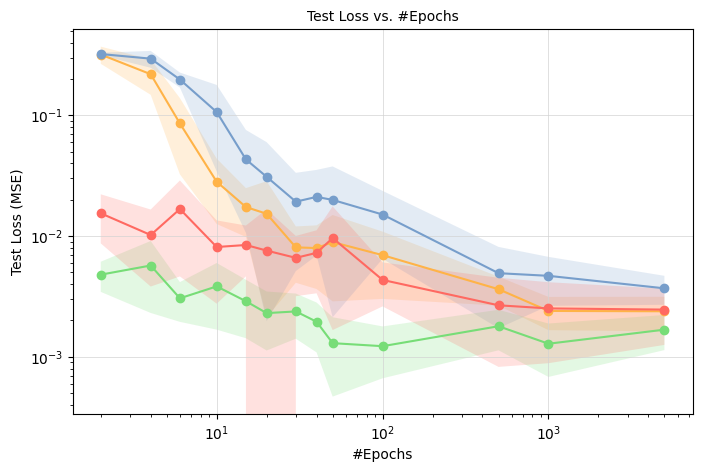

In [30]:
#results_test_loss_vs_epochs = pd.read_csv('SineResults/results_test_loss_vs_epochs.csv')

# Plot test loss vs. epochs
fig, ax = func.plot_test_loss_vs_parameter(results_test_loss_vs_epochs, 'Epochs', '#Epochs', log=True)

if save_plots:
    plt.savefig('E1_Plots/test_loss_vs_epochs_extendended_Nsamples5000.png', dpi=300)

#ax.hlines(0.24, 0, 5000, linestyles='dashed', label='Baseline Test Loss', color='grey')

# save pandas DataFrame to csv
if save_results:
    results_test_loss_vs_epochs.to_csv('E1_Results/results_test_loss_vs_epochs_all_Nsamples5000.csv')

# Test loss vs. number of training examples

In [27]:
# Define variable model parameters
num_train_points_list = [5, 10, 50, 100, 500, 1000, 5000, 10000, 20000] #[2, 3, 4, 6, 8, 10, 20, 50, 100, 150]

In [28]:
num_epochs

100

In [29]:
# Initialize an empty list to collect rows for the DataFrame
results_test_loss_vs_num_train_points = []

for _ in tqdm(range(10), desc="Outer Loop"):
    # Train data is generated for each iteration since it is dependent on the parameter num_samples

    # Loop over different number of samples
    for num_train_points in num_train_points_list:
        # Generate train data
        train_x_array, train_y_array, _, _ = func.generate_data(num_train_points, noise_std, n_waves, shifted=False)
        train_x, train_y, _, _ = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
        train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)
        

        # Test loss vs. number of samples for both MLP and SineMLP
        for i, (model_type, model_class) in enumerate([("ReLUMLP", func.ReLUMLP), ("SineMLP", func.SineMLP), ("TanhMLP", func.TanhMLP), ("SnakeMLP", func.SnakeMLP)]):
            model = model_class(input_size=input_size, hidden_sizes=hidden_sizes, output_size=output_size)  
            model, train_losses, val_losses = func.train_model(model, train_loader, test_x, test_y, num_epochs=num_epochs)
            loss_mean = func.evaluate_model(model, test_x, test_y)

            # Store results for test loss vs. number of samples
            results_test_loss_vs_num_train_points.append({
                "Metric_Type": "Test_Loss_vs_Num_Samples",
                "Model": model_type,
                "Num_points": num_train_points,
                "Noise_std": noise_std,
                "N_waves": n_waves,
                "Epochs": num_epochs,
                "Hidden_Layers": len(hidden_sizes),
                "Nodes_Per_Layer": hidden_sizes[0],
                "Batch_size": batch_size,
                "Train_Losses": train_losses,
                "Val_Losses": val_losses,
                "Test_Mean_Loss": loss_mean,
            })

# Convert the results list to a DataFrame
results_test_loss_vs_num_train_points = pd.DataFrame(results_test_loss_vs_num_train_points)

Outer Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [100/100], Train Loss: 0.0481, Validation Loss: 0.7453
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.3209
Epoch [100/100], Train Loss: 0.0005, Validation Loss: 1.4293
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.4389
Epoch [100/100], Train Loss: 0.4937, Validation Loss: 0.4463
Epoch [100/100], Train Loss: 0.0002, Validation Loss: 0.0644
Epoch [100/100], Train Loss: 0.4803, Validation Loss: 0.3916
Epoch [100/100], Train Loss: 0.0053, Validation Loss: 0.0974
Epoch [100/100], Train Loss: 0.4491, Validation Loss: 0.3390
Epoch [100/100], Train Loss: 0.0780, Validation Loss: 0.0084
Epoch [100/100], Train Loss: 0.4604, Validation Loss: 0.3474
Epoch [100/100], Train Loss: 0.0718, Validation Loss: 0.0168
Epoch [100/100], Train Loss: 0.3957, Validation Loss: 0.3188
Epoch [100/100], Train Loss: 0.0892, Validation Loss: 0.0210
Epoch [100/100], Train Loss: 0.4058, Validation Loss: 0.3120
Epoch [100/100], Train Loss: 0.0837, Validation Loss: 0.0268
Epoch [100/100], Train L

Outer Loop:  10%|█         | 1/10 [04:25<39:52, 265.83s/it]

Epoch [100/100], Train Loss: 0.0924, Validation Loss: 0.0016
Epoch [100/100], Train Loss: 0.0007, Validation Loss: 0.8797
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.5737
Epoch [100/100], Train Loss: 0.0042, Validation Loss: 1.1228
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.4888
Epoch [100/100], Train Loss: 0.3880, Validation Loss: 0.5055
Epoch [100/100], Train Loss: 0.0007, Validation Loss: 0.0783
Epoch [100/100], Train Loss: 0.2931, Validation Loss: 0.3582
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.1271
Epoch [100/100], Train Loss: 0.4024, Validation Loss: 0.3529
Epoch [100/100], Train Loss: 0.0539, Validation Loss: 0.0334
Epoch [100/100], Train Loss: 0.3824, Validation Loss: 0.3355
Epoch [100/100], Train Loss: 0.0509, Validation Loss: 0.0332
Epoch [100/100], Train Loss: 0.4073, Validation Loss: 0.2746
Epoch [100/100], Train Loss: 0.0781, Validation Loss: 0.0097
Epoch [100/100], Train Loss: 0.4219, Validation Loss: 0.2958
Epoch [100/100], Train L

Outer Loop:  20%|██        | 2/10 [08:54<35:39, 267.41s/it]

Epoch [100/100], Train Loss: 0.0934, Validation Loss: 0.0017
Epoch [100/100], Train Loss: 0.0089, Validation Loss: 0.7300
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.5724
Epoch [100/100], Train Loss: 0.0009, Validation Loss: 0.9076
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.6410
Epoch [100/100], Train Loss: 0.4169, Validation Loss: 0.4492
Epoch [100/100], Train Loss: 0.0001, Validation Loss: 0.0624
Epoch [100/100], Train Loss: 0.3004, Validation Loss: 0.3158
Epoch [100/100], Train Loss: 0.0003, Validation Loss: 0.1143
Epoch [100/100], Train Loss: 0.4435, Validation Loss: 0.3477
Epoch [100/100], Train Loss: 0.0770, Validation Loss: 0.0155
Epoch [100/100], Train Loss: 0.4460, Validation Loss: 0.3505
Epoch [100/100], Train Loss: 0.0780, Validation Loss: 0.0218
Epoch [100/100], Train Loss: 0.3783, Validation Loss: 0.3158
Epoch [100/100], Train Loss: 0.0763, Validation Loss: 0.0091
Epoch [100/100], Train Loss: 0.3832, Validation Loss: 0.3255
Epoch [100/100], Train L

Outer Loop:  30%|███       | 3/10 [13:22<31:13, 267.68s/it]

Epoch [100/100], Train Loss: 0.0916, Validation Loss: 0.0024
Epoch [100/100], Train Loss: 0.0153, Validation Loss: 0.6409
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.6305
Epoch [100/100], Train Loss: 0.0186, Validation Loss: 0.7608
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.4820
Epoch [100/100], Train Loss: 0.1702, Validation Loss: 0.4231
Epoch [100/100], Train Loss: 0.0010, Validation Loss: 0.1091
Epoch [100/100], Train Loss: 0.2438, Validation Loss: 0.4524
Epoch [100/100], Train Loss: 0.0085, Validation Loss: 0.1528
Epoch [100/100], Train Loss: 0.4548, Validation Loss: 0.3286
Epoch [100/100], Train Loss: 0.0754, Validation Loss: 0.0253
Epoch [100/100], Train Loss: 0.4699, Validation Loss: 0.3472
Epoch [100/100], Train Loss: 0.0730, Validation Loss: 0.0305
Epoch [100/100], Train Loss: 0.3432, Validation Loss: 0.2535
Epoch [100/100], Train Loss: 0.0744, Validation Loss: 0.0164
Epoch [100/100], Train Loss: 0.3695, Validation Loss: 0.3120
Epoch [100/100], Train L

Outer Loop:  40%|████      | 4/10 [17:44<26:32, 265.38s/it]

Epoch [100/100], Train Loss: 0.0936, Validation Loss: 0.0046
Epoch [100/100], Train Loss: 0.0058, Validation Loss: 0.8585
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.4522
Epoch [100/100], Train Loss: 0.0092, Validation Loss: 1.0881
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.6541
Epoch [100/100], Train Loss: 0.2425, Validation Loss: 0.4530
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.1655
Epoch [100/100], Train Loss: 0.1708, Validation Loss: 0.3614
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.1567
Epoch [100/100], Train Loss: 0.3777, Validation Loss: 0.3151
Epoch [100/100], Train Loss: 0.0378, Validation Loss: 0.0103
Epoch [100/100], Train Loss: 0.3873, Validation Loss: 0.3214
Epoch [100/100], Train Loss: 0.0298, Validation Loss: 0.0163
Epoch [100/100], Train Loss: 0.3106, Validation Loss: 0.2467
Epoch [100/100], Train Loss: 0.0700, Validation Loss: 0.0029
Epoch [100/100], Train Loss: 0.3837, Validation Loss: 0.3065
Epoch [100/100], Train L

Outer Loop:  50%|█████     | 5/10 [22:07<22:03, 264.78s/it]

Epoch [100/100], Train Loss: 0.0921, Validation Loss: 0.0027
Epoch [100/100], Train Loss: 0.0022, Validation Loss: 0.7279
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.5827
Epoch [100/100], Train Loss: 0.0005, Validation Loss: 0.8721
Epoch [100/100], Train Loss: 0.0016, Validation Loss: 0.6628
Epoch [100/100], Train Loss: 0.5607, Validation Loss: 0.5154
Epoch [100/100], Train Loss: 0.0003, Validation Loss: 0.0865
Epoch [100/100], Train Loss: 0.5346, Validation Loss: 0.4243
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.1009
Epoch [100/100], Train Loss: 0.4066, Validation Loss: 0.3389
Epoch [100/100], Train Loss: 0.0618, Validation Loss: 0.0173
Epoch [100/100], Train Loss: 0.3910, Validation Loss: 0.3228
Epoch [100/100], Train Loss: 0.0584, Validation Loss: 0.0410
Epoch [100/100], Train Loss: 0.3416, Validation Loss: 0.3365
Epoch [100/100], Train Loss: 0.0864, Validation Loss: 0.0247
Epoch [100/100], Train Loss: 0.3224, Validation Loss: 0.3127
Epoch [100/100], Train L

Outer Loop:  60%|██████    | 6/10 [26:34<17:41, 265.26s/it]

Epoch [100/100], Train Loss: 0.0950, Validation Loss: 0.0024
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.8158
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.3954
Epoch [100/100], Train Loss: 0.0055, Validation Loss: 0.9321
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.5760
Epoch [100/100], Train Loss: 0.6766, Validation Loss: 0.4715
Epoch [100/100], Train Loss: 0.0027, Validation Loss: 0.0680
Epoch [100/100], Train Loss: 0.6338, Validation Loss: 0.3988
Epoch [100/100], Train Loss: 0.0110, Validation Loss: 0.0970
Epoch [100/100], Train Loss: 0.4798, Validation Loss: 0.3915
Epoch [100/100], Train Loss: 0.1009, Validation Loss: 0.0269
Epoch [100/100], Train Loss: 0.4444, Validation Loss: 0.3560
Epoch [100/100], Train Loss: 0.0793, Validation Loss: 0.0342
Epoch [100/100], Train Loss: 0.3215, Validation Loss: 0.2637
Epoch [100/100], Train Loss: 0.0686, Validation Loss: 0.0079
Epoch [100/100], Train Loss: 0.3484, Validation Loss: 0.2987
Epoch [100/100], Train L

Outer Loop:  70%|███████   | 7/10 [31:00<13:17, 265.78s/it]

Epoch [100/100], Train Loss: 0.0932, Validation Loss: 0.0012
Epoch [100/100], Train Loss: 0.0003, Validation Loss: 0.9361
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.2224
Epoch [100/100], Train Loss: 0.0064, Validation Loss: 1.1720
Epoch [100/100], Train Loss: 0.0011, Validation Loss: 0.4732
Epoch [100/100], Train Loss: 0.5911, Validation Loss: 0.3956
Epoch [100/100], Train Loss: 0.0002, Validation Loss: 0.0821
Epoch [100/100], Train Loss: 0.4296, Validation Loss: 0.2706
Epoch [100/100], Train Loss: 0.0586, Validation Loss: 0.1256
Epoch [100/100], Train Loss: 0.4150, Validation Loss: 0.3543
Epoch [100/100], Train Loss: 0.0596, Validation Loss: 0.0289
Epoch [100/100], Train Loss: 0.4516, Validation Loss: 0.3642
Epoch [100/100], Train Loss: 0.0413, Validation Loss: 0.0379
Epoch [100/100], Train Loss: 0.4284, Validation Loss: 0.2753
Epoch [100/100], Train Loss: 0.0656, Validation Loss: 0.0112
Epoch [100/100], Train Loss: 0.4620, Validation Loss: 0.3011
Epoch [100/100], Train L

Outer Loop:  80%|████████  | 8/10 [35:28<08:52, 266.46s/it]

Epoch [100/100], Train Loss: 0.0933, Validation Loss: 0.0027
Epoch [100/100], Train Loss: 0.0022, Validation Loss: 0.8043
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.6102
Epoch [100/100], Train Loss: 0.0198, Validation Loss: 0.8887
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.6815
Epoch [100/100], Train Loss: 0.2720, Validation Loss: 0.4180
Epoch [100/100], Train Loss: 0.0005, Validation Loss: 0.0665
Epoch [100/100], Train Loss: 0.2019, Validation Loss: 0.3163
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.1385
Epoch [100/100], Train Loss: 0.3899, Validation Loss: 0.3625
Epoch [100/100], Train Loss: 0.0720, Validation Loss: 0.0239
Epoch [100/100], Train Loss: 0.4053, Validation Loss: 0.3639
Epoch [100/100], Train Loss: 0.0699, Validation Loss: 0.0262
Epoch [100/100], Train Loss: 0.3386, Validation Loss: 0.2683
Epoch [100/100], Train Loss: 0.0806, Validation Loss: 0.0058
Epoch [100/100], Train Loss: 0.3561, Validation Loss: 0.2951
Epoch [100/100], Train L

Outer Loop:  90%|█████████ | 9/10 [39:56<04:26, 266.93s/it]

Epoch [100/100], Train Loss: 0.0909, Validation Loss: 0.0092
Epoch [100/100], Train Loss: 0.0065, Validation Loss: 0.9875
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.4356
Epoch [100/100], Train Loss: 0.0129, Validation Loss: 1.2631
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.8234
Epoch [100/100], Train Loss: 0.3802, Validation Loss: 0.4656
Epoch [100/100], Train Loss: 0.0001, Validation Loss: 0.0866
Epoch [100/100], Train Loss: 0.3579, Validation Loss: 0.4046
Epoch [100/100], Train Loss: 0.0028, Validation Loss: 0.1426
Epoch [100/100], Train Loss: 0.5095, Validation Loss: 0.4046
Epoch [100/100], Train Loss: 0.0755, Validation Loss: 0.0172
Epoch [100/100], Train Loss: 0.4508, Validation Loss: 0.3459
Epoch [100/100], Train Loss: 0.0734, Validation Loss: 0.0260
Epoch [100/100], Train Loss: 0.3088, Validation Loss: 0.2029
Epoch [100/100], Train Loss: 0.0677, Validation Loss: 0.0148
Epoch [100/100], Train Loss: 0.4141, Validation Loss: 0.2909
Epoch [100/100], Train L

Outer Loop: 100%|██████████| 10/10 [44:17<00:00, 265.76s/it]

Epoch [100/100], Train Loss: 0.0929, Validation Loss: 0.0081


In [39]:
reload(func);

In [32]:
if save_results:
    results_test_loss_vs_num_train_points.to_csv('E1_Results/results_test_loss_vs_num_samples.csv')

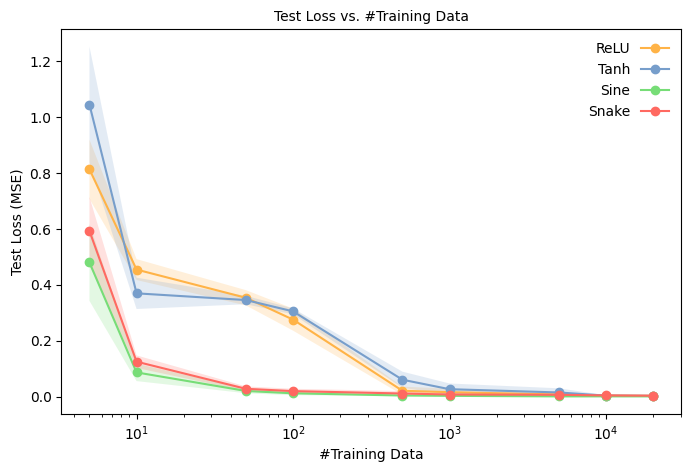

In [33]:
fig, ax = func.plot_test_loss_vs_parameter(results_test_loss_vs_num_train_points, 'Num_points', '#Training Data', log=True)
if save_results:
    results_test_loss_vs_num_train_points.to_csv('E1_Plots/results_test_loss_vs_num_train_points.csv')

# Test loss vs. number of hidden layers

In [41]:
# Define variable model parameters
num_points = 50
num_epochs = 100
hidden_sizes_list = [[64], [64, 64], [64, 64, 64], [64, 64, 64, 64], [64, 64, 64, 64, 64], [64, 64, 64, 64, 64, 64]]

In [42]:
# Initialize an empty list to collect rows for the DataFrame
results_test_loss_vs_num_hidden_layers = []

for _ in tqdm(range(10), desc="Outer Loop"):
    # Generate train data
    train_x_array, train_y_array, _, _ = func.generate_data(num_points, noise_std, n_waves, shifted=False)
    train_x, train_y, _, _ = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
    train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)

    # Loop over different epoch settings
    for h_sizes in hidden_sizes_list:
        # Test loss vs. epochs for both MLP and SineMLP
        for model_type, model_class in [("ReLUMLP", func.ReLUMLP), ("SineMLP", func.SineMLP), ("TanhMLP", func.TanhMLP), ("SnakeMLP", func.SnakeMLP)]:
            model = model_class(input_size=input_size, hidden_sizes=h_sizes, output_size=output_size)  
            model, train_losses, val_losses = func.train_model(model, train_loader, test_x, test_y, num_epochs=num_epochs)
            loss_mean = func.evaluate_model(model, test_x, test_y)

            # Store results for test loss vs. epochs
            results_test_loss_vs_num_hidden_layers.append({
                "Metric_Type": "Test_Loss_vs_Hidden_Layers",
                "Model": model_type,
                "Num_points": num_points,
                "Noise_std": noise_std,
                "N_waves": n_waves,
                "Epochs": epoch,
                "Hidden_Layers": len(h_sizes),
                "Nodes_Per_Layer": h_sizes[0],
                "Batch_size": batch_size,
                "Train_Losses": train_losses,
                "Val_Losses": val_losses,
                "Test_Mean_Loss": loss_mean,
            })

# Convert the results list to a DataFrame
results_test_loss_vs_num_hidden_layers = pd.DataFrame(results_test_loss_vs_num_hidden_layers)

Outer Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [100/100], Train Loss: 0.4721, Validation Loss: 0.5055
Epoch [100/100], Train Loss: 0.1038, Validation Loss: 0.0239
Epoch [100/100], Train Loss: 0.3781, Validation Loss: 0.4054
Epoch [100/100], Train Loss: 0.1560, Validation Loss: 0.1021
Epoch [100/100], Train Loss: 0.3238, Validation Loss: 0.3562
Epoch [100/100], Train Loss: 0.0954, Validation Loss: 0.0293
Epoch [100/100], Train Loss: 0.3216, Validation Loss: 0.3353
Epoch [100/100], Train Loss: 0.0936, Validation Loss: 0.0376
Epoch [100/100], Train Loss: 0.1979, Validation Loss: 0.1932
Epoch [100/100], Train Loss: 0.0937, Validation Loss: 0.0305
Epoch [100/100], Train Loss: 0.3329, Validation Loss: 0.3207
Epoch [100/100], Train Loss: 0.0897, Validation Loss: 0.0384
Epoch [100/100], Train Loss: 0.1208, Validation Loss: 0.0871
Epoch [100/100], Train Loss: 0.0966, Validation Loss: 0.0312
Epoch [100/100], Train Loss: 0.2989, Validation Loss: 0.3304
Epoch [100/100], Train Loss: 0.0787, Validation Loss: 0.0405
Epoch [100/100], Train L

Outer Loop:  10%|█         | 1/10 [00:03<00:30,  3.41s/it]

Epoch [100/100], Train Loss: 0.0877, Validation Loss: 0.0404
Epoch [100/100], Train Loss: 0.5960, Validation Loss: 0.4610
Epoch [100/100], Train Loss: 0.0558, Validation Loss: 0.0363
Epoch [100/100], Train Loss: 0.5755, Validation Loss: 0.4214
Epoch [100/100], Train Loss: 0.5972, Validation Loss: 0.4689
Epoch [100/100], Train Loss: 0.4568, Validation Loss: 0.3048
Epoch [100/100], Train Loss: 0.0384, Validation Loss: 0.0229
Epoch [100/100], Train Loss: 0.5178, Validation Loss: 0.3591
Epoch [100/100], Train Loss: 0.0341, Validation Loss: 0.0344
Epoch [100/100], Train Loss: 0.4042, Validation Loss: 0.2532
Epoch [100/100], Train Loss: 0.0379, Validation Loss: 0.0244
Epoch [100/100], Train Loss: 0.4225, Validation Loss: 0.2557
Epoch [100/100], Train Loss: 0.0370, Validation Loss: 0.0396
Epoch [100/100], Train Loss: 0.1173, Validation Loss: 0.0366
Epoch [100/100], Train Loss: 0.0364, Validation Loss: 0.0280
Epoch [100/100], Train Loss: 0.4385, Validation Loss: 0.2685
Epoch [100/100], Train L

Outer Loop:  20%|██        | 2/10 [00:06<00:27,  3.39s/it]

Epoch [100/100], Train Loss: 0.0289, Validation Loss: 0.0385
Epoch [100/100], Train Loss: 0.5124, Validation Loss: 0.5042
Epoch [100/100], Train Loss: 0.0704, Validation Loss: 0.0367
Epoch [100/100], Train Loss: 0.4281, Validation Loss: 0.4278
Epoch [100/100], Train Loss: 0.2977, Validation Loss: 0.2803
Epoch [100/100], Train Loss: 0.3488, Validation Loss: 0.3640
Epoch [100/100], Train Loss: 0.0386, Validation Loss: 0.0299
Epoch [100/100], Train Loss: 0.3287, Validation Loss: 0.3417
Epoch [100/100], Train Loss: 0.0394, Validation Loss: 0.0349
Epoch [100/100], Train Loss: 0.1986, Validation Loss: 0.2305
Epoch [100/100], Train Loss: 0.0365, Validation Loss: 0.0315
Epoch [100/100], Train Loss: 0.2814, Validation Loss: 0.2888
Epoch [100/100], Train Loss: 0.0335, Validation Loss: 0.0413
Epoch [100/100], Train Loss: 0.0942, Validation Loss: 0.1240
Epoch [100/100], Train Loss: 0.0350, Validation Loss: 0.0320
Epoch [100/100], Train Loss: 0.4204, Validation Loss: 0.3511
Epoch [100/100], Train L

Outer Loop:  30%|███       | 3/10 [00:10<00:24,  3.50s/it]

Epoch [100/100], Train Loss: 0.0342, Validation Loss: 0.0404
Epoch [100/100], Train Loss: 0.5686, Validation Loss: 0.4747
Epoch [100/100], Train Loss: 0.0559, Validation Loss: 0.0083
Epoch [100/100], Train Loss: 0.5060, Validation Loss: 0.4081
Epoch [100/100], Train Loss: 0.1955, Validation Loss: 0.1407
Epoch [100/100], Train Loss: 0.4666, Validation Loss: 0.3577
Epoch [100/100], Train Loss: 0.0476, Validation Loss: 0.0141
Epoch [100/100], Train Loss: 0.4261, Validation Loss: 0.3402
Epoch [100/100], Train Loss: 0.0443, Validation Loss: 0.0212
Epoch [100/100], Train Loss: 0.2470, Validation Loss: 0.1700
Epoch [100/100], Train Loss: 0.0454, Validation Loss: 0.0161
Epoch [100/100], Train Loss: 0.4127, Validation Loss: 0.3222
Epoch [100/100], Train Loss: 0.0372, Validation Loss: 0.0246
Epoch [100/100], Train Loss: 0.0525, Validation Loss: 0.0232
Epoch [100/100], Train Loss: 0.0444, Validation Loss: 0.0185
Epoch [100/100], Train Loss: 0.4066, Validation Loss: 0.2820
Epoch [100/100], Train L

Outer Loop:  40%|████      | 4/10 [00:13<00:20,  3.45s/it]

Epoch [100/100], Train Loss: 0.0292, Validation Loss: 0.0298
Epoch [100/100], Train Loss: 0.5230, Validation Loss: 0.4702
Epoch [100/100], Train Loss: 0.0810, Validation Loss: 0.0104
Epoch [100/100], Train Loss: 0.5081, Validation Loss: 0.4450
Epoch [100/100], Train Loss: 0.1918, Validation Loss: 0.1369
Epoch [100/100], Train Loss: 0.4469, Validation Loss: 0.3687
Epoch [100/100], Train Loss: 0.0756, Validation Loss: 0.0105
Epoch [100/100], Train Loss: 0.4259, Validation Loss: 0.3426
Epoch [100/100], Train Loss: 0.0649, Validation Loss: 0.0226
Epoch [100/100], Train Loss: 0.1814, Validation Loss: 0.1165
Epoch [100/100], Train Loss: 0.0752, Validation Loss: 0.0093
Epoch [100/100], Train Loss: 0.4181, Validation Loss: 0.3365
Epoch [100/100], Train Loss: 0.0687, Validation Loss: 0.0256
Epoch [100/100], Train Loss: 0.2034, Validation Loss: 0.1462
Epoch [100/100], Train Loss: 0.0673, Validation Loss: 0.0177
Epoch [100/100], Train Loss: 0.3928, Validation Loss: 0.2973
Epoch [100/100], Train L

Outer Loop:  50%|█████     | 5/10 [00:17<00:17,  3.45s/it]

Epoch [100/100], Train Loss: 0.0588, Validation Loss: 0.0426
Epoch [100/100], Train Loss: 0.6081, Validation Loss: 0.4681
Epoch [100/100], Train Loss: 0.0745, Validation Loss: 0.0118
Epoch [100/100], Train Loss: 0.5194, Validation Loss: 0.4008
Epoch [100/100], Train Loss: 0.1892, Validation Loss: 0.0986
Epoch [100/100], Train Loss: 0.4490, Validation Loss: 0.3476
Epoch [100/100], Train Loss: 0.0478, Validation Loss: 0.0170
Epoch [100/100], Train Loss: 0.4134, Validation Loss: 0.3234
Epoch [100/100], Train Loss: 0.0489, Validation Loss: 0.0135
Epoch [100/100], Train Loss: 0.2177, Validation Loss: 0.1832
Epoch [100/100], Train Loss: 0.0484, Validation Loss: 0.0146
Epoch [100/100], Train Loss: 0.3692, Validation Loss: 0.2947
Epoch [100/100], Train Loss: 0.0436, Validation Loss: 0.0225
Epoch [100/100], Train Loss: 0.1894, Validation Loss: 0.1201
Epoch [100/100], Train Loss: 0.0469, Validation Loss: 0.0175
Epoch [100/100], Train Loss: 0.3740, Validation Loss: 0.2791
Epoch [100/100], Train L

Outer Loop:  60%|██████    | 6/10 [00:20<00:13,  3.42s/it]

Epoch [100/100], Train Loss: 0.0482, Validation Loss: 0.0285
Epoch [100/100], Train Loss: 0.5651, Validation Loss: 0.4816
Epoch [100/100], Train Loss: 0.0754, Validation Loss: 0.0120
Epoch [100/100], Train Loss: 0.5029, Validation Loss: 0.4092
Epoch [100/100], Train Loss: 0.3395, Validation Loss: 0.2740
Epoch [100/100], Train Loss: 0.4470, Validation Loss: 0.3372
Epoch [100/100], Train Loss: 0.0724, Validation Loss: 0.0104
Epoch [100/100], Train Loss: 0.4565, Validation Loss: 0.3541
Epoch [100/100], Train Loss: 0.0609, Validation Loss: 0.0186
Epoch [100/100], Train Loss: 0.2502, Validation Loss: 0.1745
Epoch [100/100], Train Loss: 0.0680, Validation Loss: 0.0123
Epoch [100/100], Train Loss: 0.4318, Validation Loss: 0.3259
Epoch [100/100], Train Loss: 0.0599, Validation Loss: 0.0202
Epoch [100/100], Train Loss: 0.2052, Validation Loss: 0.1223
Epoch [100/100], Train Loss: 0.0691, Validation Loss: 0.0130
Epoch [100/100], Train Loss: 0.4260, Validation Loss: 0.3136
Epoch [100/100], Train L

Outer Loop:  70%|███████   | 7/10 [00:23<00:10,  3.41s/it]

Epoch [100/100], Train Loss: 0.0524, Validation Loss: 0.0363
Epoch [100/100], Train Loss: 0.5462, Validation Loss: 0.4932
Epoch [100/100], Train Loss: 0.1116, Validation Loss: 0.0394
Epoch [100/100], Train Loss: 0.4804, Validation Loss: 0.4278
Epoch [100/100], Train Loss: 0.4042, Validation Loss: 0.3562
Epoch [100/100], Train Loss: 0.3781, Validation Loss: 0.3280
Epoch [100/100], Train Loss: 0.0890, Validation Loss: 0.0193
Epoch [100/100], Train Loss: 0.4023, Validation Loss: 0.3508
Epoch [100/100], Train Loss: 0.0788, Validation Loss: 0.0259
Epoch [100/100], Train Loss: 0.3021, Validation Loss: 0.2280
Epoch [100/100], Train Loss: 0.0884, Validation Loss: 0.0201
Epoch [100/100], Train Loss: 0.3764, Validation Loss: 0.3309
Epoch [100/100], Train Loss: 0.0795, Validation Loss: 0.0319
Epoch [100/100], Train Loss: 0.1669, Validation Loss: 0.2161
Epoch [100/100], Train Loss: 0.0862, Validation Loss: 0.0226
Epoch [100/100], Train Loss: 0.3955, Validation Loss: 0.3128
Epoch [100/100], Train L

Outer Loop:  80%|████████  | 8/10 [00:27<00:06,  3.38s/it]

Epoch [100/100], Train Loss: 0.0605, Validation Loss: 0.0411
Epoch [100/100], Train Loss: 0.6630, Validation Loss: 0.4792
Epoch [100/100], Train Loss: 0.1130, Validation Loss: 0.0122
Epoch [100/100], Train Loss: 0.5868, Validation Loss: 0.4157
Epoch [100/100], Train Loss: 0.3790, Validation Loss: 0.2177
Epoch [100/100], Train Loss: 0.4848, Validation Loss: 0.3252
Epoch [100/100], Train Loss: 0.0845, Validation Loss: 0.0241
Epoch [100/100], Train Loss: 0.5027, Validation Loss: 0.3493
Epoch [100/100], Train Loss: 0.0894, Validation Loss: 0.0537
Epoch [100/100], Train Loss: 0.3306, Validation Loss: 0.2157
Epoch [100/100], Train Loss: 0.0824, Validation Loss: 0.0328
Epoch [100/100], Train Loss: 0.4448, Validation Loss: 0.3038
Epoch [100/100], Train Loss: 0.0754, Validation Loss: 0.0380
Epoch [100/100], Train Loss: 0.3634, Validation Loss: 0.2729
Epoch [100/100], Train Loss: 0.0827, Validation Loss: 0.0353
Epoch [100/100], Train Loss: 0.5022, Validation Loss: 0.3291
Epoch [100/100], Train L

Outer Loop:  90%|█████████ | 9/10 [00:30<00:03,  3.46s/it]

Epoch [100/100], Train Loss: 0.0700, Validation Loss: 0.0469
Epoch [100/100], Train Loss: 0.5489, Validation Loss: 0.4902
Epoch [100/100], Train Loss: 0.0900, Validation Loss: 0.0140
Epoch [100/100], Train Loss: 0.4544, Validation Loss: 0.3964
Epoch [100/100], Train Loss: 0.1577, Validation Loss: 0.0883
Epoch [100/100], Train Loss: 0.3929, Validation Loss: 0.3475
Epoch [100/100], Train Loss: 0.0817, Validation Loss: 0.0099
Epoch [100/100], Train Loss: 0.3877, Validation Loss: 0.3318
Epoch [100/100], Train Loss: 0.0679, Validation Loss: 0.0211
Epoch [100/100], Train Loss: 0.3053, Validation Loss: 0.2605
Epoch [100/100], Train Loss: 0.0720, Validation Loss: 0.0119
Epoch [100/100], Train Loss: 0.3691, Validation Loss: 0.3016
Epoch [100/100], Train Loss: 0.0529, Validation Loss: 0.0278
Epoch [100/100], Train Loss: 0.1711, Validation Loss: 0.0854
Epoch [100/100], Train Loss: 0.0739, Validation Loss: 0.0147
Epoch [100/100], Train Loss: 0.3351, Validation Loss: 0.2699
Epoch [100/100], Train L

Outer Loop: 100%|██████████| 10/10 [00:34<00:00,  3.46s/it]

Epoch [100/100], Train Loss: 0.0507, Validation Loss: 0.0440


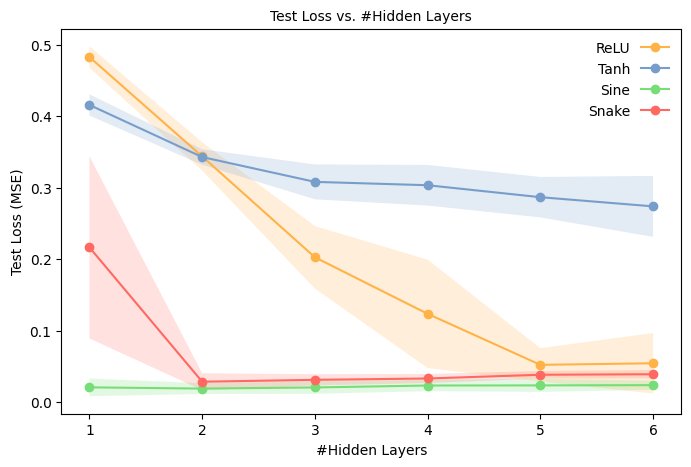

In [43]:
fig, ax = func.plot_test_loss_vs_parameter(results_test_loss_vs_num_hidden_layers, 'Hidden_Layers', '#Hidden Layers')

if save_plots:
    plt.savefig('E1_Plots/test_loss_vs_hidden_layers.png', dpi=300)

if save_results:
    results_test_loss_vs_num_hidden_layers.to_csv('E1_Results/results_test_loss_vs_num_hidden_layers.csv')

# Test loss vs. number of nodes in hidden layers

In [44]:
# Define variable model parameters
num_points = 50
num_epochs = 100
num_nodes_list = [[2, 2], [4, 4], [8, 8], [16, 16], [32, 32], [64, 64], [128, 128]]

In [49]:
# Initialize an empty list to collect rows for the DataFrame
results_test_loss_vs_num_nodes = []

for _ in tqdm(range(10), desc="Outer Loop"):
    # Generate train data
    train_x_array, train_y_array, _, _ = func.generate_data(num_points, noise_std, n_waves, shifted=False)
    train_x, train_y, _, _ = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
    train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)

    # Loop over different epoch settings
    for num_nodes in num_nodes_list:
        # Test loss vs. epochs for both MLP and SineMLP
        for model_type, model_class in [("ReLUMLP", func.ReLUMLP), ("SineMLP", func.SineMLP), ("TanhMLP", func.TanhMLP), ("SnakeMLP", func.SnakeMLP)]:
            model = model_class(input_size=input_size, hidden_sizes=num_nodes, output_size=output_size)  
            model, train_losses, val_losses = func.train_model(model, train_loader, test_x, test_y, num_epochs=num_epochs)
            loss_mean = func.evaluate_model(model, test_x, test_y)

            # Store results for test loss vs. epochs
            results_test_loss_vs_num_nodes.append({
                "Metric_Type": "Test_Loss_vs_Nodes_Per_Layer",
                "Model": model_type,
                "Num_points": num_points,
                "Noise_std": noise_std,
                "N_waves": n_waves,
                "Epochs": epoch,
                "Hidden_Layers": len(num_nodes),
                "Nodes_Per_Layer": num_nodes[0],
                "Batch_size": batch_size,
                "Train_Losses": train_losses,
                "Val_Losses": val_losses,
                "Test_Mean_Loss": loss_mean,
            })

# Convert the results list to a DataFrame
results_test_loss_vs_num_nodes = pd.DataFrame(results_test_loss_vs_num_nodes)

Outer Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [100/100], Train Loss: 0.7382, Validation Loss: 0.6268
Epoch [100/100], Train Loss: 0.6240, Validation Loss: 0.5047
Epoch [100/100], Train Loss: 0.6201, Validation Loss: 0.5062
Epoch [100/100], Train Loss: 0.5913, Validation Loss: 0.4867
Epoch [100/100], Train Loss: 0.6632, Validation Loss: 0.5592
Epoch [100/100], Train Loss: 0.3498, Validation Loss: 0.2645
Epoch [100/100], Train Loss: 0.6228, Validation Loss: 0.5031
Epoch [100/100], Train Loss: 0.5599, Validation Loss: 0.4816
Epoch [100/100], Train Loss: 0.5961, Validation Loss: 0.4893
Epoch [100/100], Train Loss: 0.5079, Validation Loss: 0.4373
Epoch [100/100], Train Loss: 0.5948, Validation Loss: 0.4856
Epoch [100/100], Train Loss: 0.4907, Validation Loss: 0.3985
Epoch [100/100], Train Loss: 0.5977, Validation Loss: 0.4968
Epoch [100/100], Train Loss: 0.0679, Validation Loss: 0.0191
Epoch [100/100], Train Loss: 0.5673, Validation Loss: 0.4594
Epoch [100/100], Train Loss: 0.1141, Validation Loss: 0.0693
Epoch [100/100], Train L

Outer Loop:  10%|█         | 1/10 [00:02<00:25,  2.84s/it]

Epoch [100/100], Train Loss: 0.4408, Validation Loss: 0.3288
Epoch [100/100], Train Loss: 0.0441, Validation Loss: 0.0361
Epoch [100/100], Train Loss: 0.6742, Validation Loss: 0.5258
Epoch [100/100], Train Loss: 0.4351, Validation Loss: 0.3189
Epoch [100/100], Train Loss: 0.6911, Validation Loss: 0.5293
Epoch [100/100], Train Loss: 0.5991, Validation Loss: 0.4596
Epoch [100/100], Train Loss: 0.7237, Validation Loss: 0.5526
Epoch [100/100], Train Loss: 0.6599, Validation Loss: 0.4986
Epoch [100/100], Train Loss: 0.6612, Validation Loss: 0.5111
Epoch [100/100], Train Loss: 0.5491, Validation Loss: 0.4052
Epoch [100/100], Train Loss: 0.6342, Validation Loss: 0.4854
Epoch [100/100], Train Loss: 0.1365, Validation Loss: 0.0617
Epoch [100/100], Train Loss: 0.6130, Validation Loss: 0.4691
Epoch [100/100], Train Loss: 0.2673, Validation Loss: 0.1733
Epoch [100/100], Train Loss: 0.5696, Validation Loss: 0.4311
Epoch [100/100], Train Loss: 0.0703, Validation Loss: 0.0129
Epoch [100/100], Train L

Outer Loop:  20%|██        | 2/10 [00:05<00:22,  2.82s/it]

Epoch [100/100], Train Loss: 0.3963, Validation Loss: 0.3131
Epoch [100/100], Train Loss: 0.0594, Validation Loss: 0.0218
Epoch [100/100], Train Loss: 0.5961, Validation Loss: 0.5058
Epoch [100/100], Train Loss: 0.5698, Validation Loss: 0.4921
Epoch [100/100], Train Loss: 0.5862, Validation Loss: 0.5020
Epoch [100/100], Train Loss: 0.3512, Validation Loss: 0.2735
Epoch [100/100], Train Loss: 0.6124, Validation Loss: 0.5091
Epoch [100/100], Train Loss: 0.5532, Validation Loss: 0.4631
Epoch [100/100], Train Loss: 0.6053, Validation Loss: 0.5095
Epoch [100/100], Train Loss: 0.6141, Validation Loss: 0.5159
Epoch [100/100], Train Loss: 0.5763, Validation Loss: 0.4924
Epoch [100/100], Train Loss: 0.3089, Validation Loss: 0.2383
Epoch [100/100], Train Loss: 0.5662, Validation Loss: 0.4764
Epoch [100/100], Train Loss: 0.1724, Validation Loss: 0.1122
Epoch [100/100], Train Loss: 0.5478, Validation Loss: 0.4554
Epoch [100/100], Train Loss: 0.0687, Validation Loss: 0.0089
Epoch [100/100], Train L

Outer Loop:  30%|███       | 3/10 [00:08<00:19,  2.82s/it]

Epoch [100/100], Train Loss: 0.0539, Validation Loss: 0.0194
Epoch [100/100], Train Loss: 0.5890, Validation Loss: 0.5157
Epoch [100/100], Train Loss: 0.5556, Validation Loss: 0.4860
Epoch [100/100], Train Loss: 0.5723, Validation Loss: 0.5069
Epoch [100/100], Train Loss: 0.7065, Validation Loss: 0.6198
Epoch [100/100], Train Loss: 0.5610, Validation Loss: 0.4979
Epoch [100/100], Train Loss: 0.5512, Validation Loss: 0.4851
Epoch [100/100], Train Loss: 0.5825, Validation Loss: 0.5134
Epoch [100/100], Train Loss: 0.5778, Validation Loss: 0.5052
Epoch [100/100], Train Loss: 0.5440, Validation Loss: 0.4823
Epoch [100/100], Train Loss: 0.2278, Validation Loss: 0.1637
Epoch [100/100], Train Loss: 0.5381, Validation Loss: 0.4753
Epoch [100/100], Train Loss: 0.3593, Validation Loss: 0.2860
Epoch [100/100], Train Loss: 0.5571, Validation Loss: 0.4950
Epoch [100/100], Train Loss: 0.0786, Validation Loss: 0.0106
Epoch [100/100], Train Loss: 0.5370, Validation Loss: 0.4738
Epoch [100/100], Train L

Outer Loop:  40%|████      | 4/10 [00:11<00:16,  2.82s/it]

Epoch [100/100], Train Loss: 0.0862, Validation Loss: 0.0169
Epoch [100/100], Train Loss: 0.7864, Validation Loss: 0.6399
Epoch [100/100], Train Loss: 0.6270, Validation Loss: 0.4677
Epoch [100/100], Train Loss: 0.7452, Validation Loss: 0.6070
Epoch [100/100], Train Loss: 0.6383, Validation Loss: 0.5027
Epoch [100/100], Train Loss: 0.6853, Validation Loss: 0.5401
Epoch [100/100], Train Loss: 0.6383, Validation Loss: 0.4968
Epoch [100/100], Train Loss: 0.6408, Validation Loss: 0.4968
Epoch [100/100], Train Loss: 0.4847, Validation Loss: 0.3525
Epoch [100/100], Train Loss: 0.6232, Validation Loss: 0.4841
Epoch [100/100], Train Loss: 0.5877, Validation Loss: 0.4542
Epoch [100/100], Train Loss: 0.6184, Validation Loss: 0.4745
Epoch [100/100], Train Loss: 0.5629, Validation Loss: 0.4367
Epoch [100/100], Train Loss: 0.6353, Validation Loss: 0.4938
Epoch [100/100], Train Loss: 0.0956, Validation Loss: 0.0093
Epoch [100/100], Train Loss: 0.5757, Validation Loss: 0.4317
Epoch [100/100], Train L

Outer Loop:  50%|█████     | 5/10 [00:14<00:14,  2.85s/it]

Epoch [100/100], Train Loss: 0.0727, Validation Loss: 0.0279
Epoch [100/100], Train Loss: 0.7762, Validation Loss: 0.5081
Epoch [100/100], Train Loss: 0.7852, Validation Loss: 0.5226
Epoch [100/100], Train Loss: 0.7819, Validation Loss: 0.5092
Epoch [100/100], Train Loss: 0.7455, Validation Loss: 0.4969
Epoch [100/100], Train Loss: 0.7631, Validation Loss: 0.5026
Epoch [100/100], Train Loss: 0.5937, Validation Loss: 0.4096
Epoch [100/100], Train Loss: 0.7954, Validation Loss: 0.5289
Epoch [100/100], Train Loss: 0.6246, Validation Loss: 0.4019
Epoch [100/100], Train Loss: 0.7513, Validation Loss: 0.4989
Epoch [100/100], Train Loss: 0.0967, Validation Loss: 0.0187
Epoch [100/100], Train Loss: 0.7542, Validation Loss: 0.5118
Epoch [100/100], Train Loss: 0.6014, Validation Loss: 0.3916
Epoch [100/100], Train Loss: 0.7346, Validation Loss: 0.4852
Epoch [100/100], Train Loss: 0.0828, Validation Loss: 0.0454
Epoch [100/100], Train Loss: 0.6629, Validation Loss: 0.4426
Epoch [100/100], Train L

Outer Loop:  60%|██████    | 6/10 [00:16<00:11,  2.83s/it]

Epoch [100/100], Train Loss: 0.0658, Validation Loss: 0.0632
Epoch [100/100], Train Loss: 1.5192, Validation Loss: 1.4537
Epoch [100/100], Train Loss: 0.8293, Validation Loss: 0.8044
Epoch [100/100], Train Loss: 0.6444, Validation Loss: 0.5980
Epoch [100/100], Train Loss: 0.5251, Validation Loss: 0.4820
Epoch [100/100], Train Loss: 0.5746, Validation Loss: 0.5192
Epoch [100/100], Train Loss: 0.5172, Validation Loss: 0.4712
Epoch [100/100], Train Loss: 0.5527, Validation Loss: 0.5013
Epoch [100/100], Train Loss: 0.4235, Validation Loss: 0.3608
Epoch [100/100], Train Loss: 0.5385, Validation Loss: 0.4763
Epoch [100/100], Train Loss: 0.4635, Validation Loss: 0.4337
Epoch [100/100], Train Loss: 0.5258, Validation Loss: 0.4708
Epoch [100/100], Train Loss: 0.2973, Validation Loss: 0.2544
Epoch [100/100], Train Loss: 0.5070, Validation Loss: 0.4504
Epoch [100/100], Train Loss: 0.0488, Validation Loss: 0.0143
Epoch [100/100], Train Loss: 0.4868, Validation Loss: 0.4237
Epoch [100/100], Train L

Outer Loop:  70%|███████   | 7/10 [00:19<00:08,  2.88s/it]

Epoch [100/100], Train Loss: 0.3649, Validation Loss: 0.3013
Epoch [100/100], Train Loss: 0.0348, Validation Loss: 0.0186
Epoch [100/100], Train Loss: 0.5794, Validation Loss: 0.5458
Epoch [100/100], Train Loss: 0.6780, Validation Loss: 0.6472
Epoch [100/100], Train Loss: 0.5475, Validation Loss: 0.5134
Epoch [100/100], Train Loss: 0.3116, Validation Loss: 0.2624
Epoch [100/100], Train Loss: 0.5778, Validation Loss: 0.5429
Epoch [100/100], Train Loss: 0.5362, Validation Loss: 0.5112
Epoch [100/100], Train Loss: 0.5260, Validation Loss: 0.4942
Epoch [100/100], Train Loss: 0.4784, Validation Loss: 0.4573
Epoch [100/100], Train Loss: 0.5611, Validation Loss: 0.5246
Epoch [100/100], Train Loss: 0.2440, Validation Loss: 0.1829
Epoch [100/100], Train Loss: 0.5067, Validation Loss: 0.4713
Epoch [100/100], Train Loss: 0.2360, Validation Loss: 0.1749
Epoch [100/100], Train Loss: 0.4924, Validation Loss: 0.4536
Epoch [100/100], Train Loss: 0.0857, Validation Loss: 0.0072
Epoch [100/100], Train L

Outer Loop:  80%|████████  | 8/10 [00:22<00:05,  2.88s/it]

Epoch [100/100], Train Loss: 0.0642, Validation Loss: 0.0137
Epoch [100/100], Train Loss: 0.7738, Validation Loss: 0.5513
Epoch [100/100], Train Loss: 0.6345, Validation Loss: 0.4545
Epoch [100/100], Train Loss: 0.7046, Validation Loss: 0.5018
Epoch [100/100], Train Loss: 0.7112, Validation Loss: 0.5042
Epoch [100/100], Train Loss: 0.7281, Validation Loss: 0.5441
Epoch [100/100], Train Loss: 0.5194, Validation Loss: 0.3586
Epoch [100/100], Train Loss: 0.6826, Validation Loss: 0.4909
Epoch [100/100], Train Loss: 0.5782, Validation Loss: 0.4044
Epoch [100/100], Train Loss: 0.7195, Validation Loss: 0.5197
Epoch [100/100], Train Loss: 0.3628, Validation Loss: 0.2055
Epoch [100/100], Train Loss: 0.6585, Validation Loss: 0.4704
Epoch [100/100], Train Loss: 0.6055, Validation Loss: 0.4404
Epoch [100/100], Train Loss: 0.6193, Validation Loss: 0.4293
Epoch [100/100], Train Loss: 0.0724, Validation Loss: 0.0180
Epoch [100/100], Train Loss: 0.6266, Validation Loss: 0.4430
Epoch [100/100], Train L

Outer Loop:  90%|█████████ | 9/10 [00:25<00:02,  2.88s/it]

Epoch [100/100], Train Loss: 0.4752, Validation Loss: 0.3213
Epoch [100/100], Train Loss: 0.0837, Validation Loss: 0.0277
Epoch [100/100], Train Loss: 0.5884, Validation Loss: 0.5105
Epoch [100/100], Train Loss: 0.5610, Validation Loss: 0.5099
Epoch [100/100], Train Loss: 0.5709, Validation Loss: 0.5025
Epoch [100/100], Train Loss: 0.6318, Validation Loss: 0.6179
Epoch [100/100], Train Loss: 0.5572, Validation Loss: 0.5084
Epoch [100/100], Train Loss: 0.1392, Validation Loss: 0.0841
Epoch [100/100], Train Loss: 0.5200, Validation Loss: 0.4667
Epoch [100/100], Train Loss: 0.4964, Validation Loss: 0.4406
Epoch [100/100], Train Loss: 0.5246, Validation Loss: 0.4789
Epoch [100/100], Train Loss: 0.2696, Validation Loss: 0.2132
Epoch [100/100], Train Loss: 0.5655, Validation Loss: 0.5050
Epoch [100/100], Train Loss: 0.4614, Validation Loss: 0.3959
Epoch [100/100], Train Loss: 0.5245, Validation Loss: 0.4724
Epoch [100/100], Train Loss: 0.1288, Validation Loss: 0.0686
Epoch [100/100], Train L

Outer Loop: 100%|██████████| 10/10 [00:28<00:00,  2.85s/it]

Epoch [100/100], Train Loss: 0.0535, Validation Loss: 0.0227


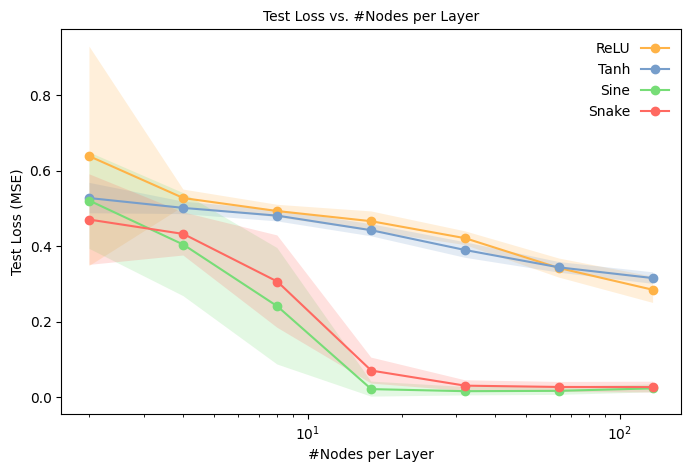

In [50]:
fig, ax = func.plot_test_loss_vs_parameter(results_test_loss_vs_num_nodes, 'Nodes_Per_Layer', '#Nodes per Layer',log=True)

if save_plots:
    plt.savefig('E1_Plots/test_loss_vs_nodes_per_layer.png', dpi=300)

if save_results:
    results_test_loss_vs_num_nodes.to_csv('E1_Results/results_test_loss_vs_num_nodes.csv')

# Plot summary

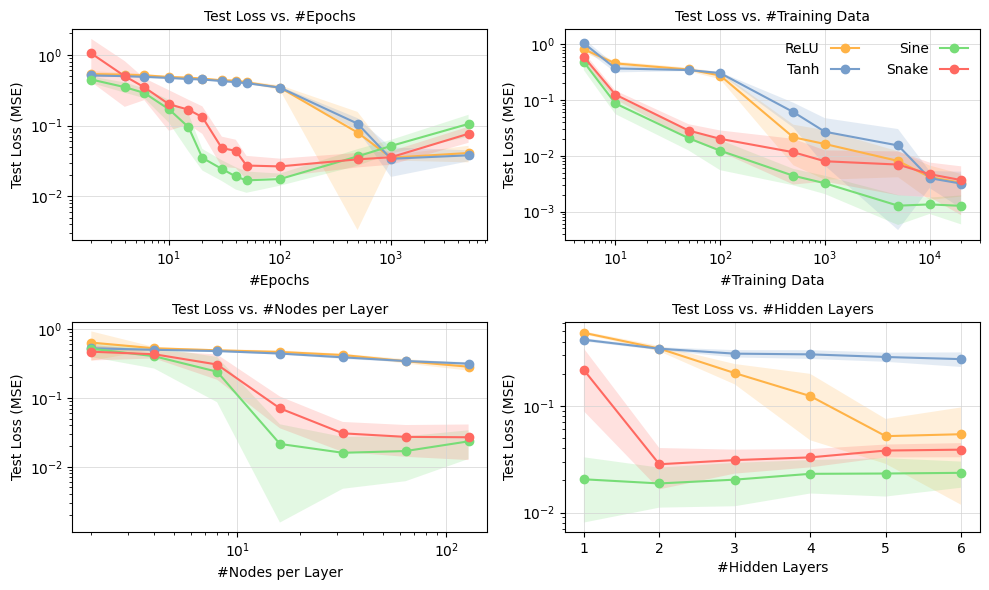

In [80]:
reload(func);

fig, ax = plt.subplots(2, 2, figsize=(10, 6)) #, sharey=True)
ax = ax.flatten()

func.plot_test_loss_vs_parameter(results_test_loss_vs_epochs, 'Epochs', '#Epochs', ax=ax[0], log=True)
func.plot_test_loss_vs_parameter(results_test_loss_vs_num_train_points, 'Num_points', '#Training Data', ax=ax[1], log=True, legend=True)
func.plot_test_loss_vs_parameter(results_test_loss_vs_num_nodes, 'Nodes_Per_Layer', '#Nodes per Layer', ax=ax[2], log=True)
func.plot_test_loss_vs_parameter(results_test_loss_vs_num_hidden_layers, 'Hidden_Layers', '#Hidden Layers', ax=ax[3], log=False)

ax[0].set_ylabel('Test Loss (MSE)')
fig.tight_layout()

if save_plots:
    plt.savefig('E1_Plots/test_loss_vs_all_parameters.png', dpi=300)


# How much more efficient is the training process when using the sine activation function?

### MLP

In [ ]:
# GENERATE DATA

# Parameters for dataset for MLP
num_samples = 100
train_points = 100
noise_std = 0.2
n_waves = 5

# Generate data
df = func.generate_data(num_samples, train_points, noise_std, n_waves)

# Define model parameters
input_size, hidden_sizes, output_size = 1, [128, 128], 1
batch_size = 25
num_epochs = 60
print_every = 10

# Convert data to tensors and create dataloaders
train_x, train_y, val_x, val_y, test_x, test_y = func.convert_to_tensor(df)
train_loader, val_loader, test_loader = func.create_dataloader(train_x, train_y, val_x, val_y, test_x, test_y, batch_size=batch_size)

# Define and train model
MLP = func.MLP(input_size, hidden_sizes, output_size)
model, train_losses, val_losses = func.train_model(MLP, train_loader, val_loader, num_epochs=num_epochs, print_every=print_every)
func.plot_losses(train_losses, val_losses, 'MLP')

# EVALUATE MODEL
loss_mean, loss_std = func.evaluate_model(model, test_loader)
print(f"Test Loss: {loss_mean:.4f} +/- {loss_std:.4f}")
func.plot_predictions(model, df, 'MLP')

In [ ]:
# GENERATE DATA

# Parameters for dataset for SineMLP
num_samples = 20
train_points = 100
noise_std = 0.2
n_waves = 5

# Generate data
df = func.generate_data(num_samples, train_points, noise_std, n_waves)

# Define model parameters
input_size, hidden_sizes, output_size = 1, [128, 128], 1
batch_size = 25
num_epochs = 20
print_every = 10

# Convert data to tensors and create dataloaders
train_x, train_y, val_x, val_y, test_x, test_y = func.convert_to_tensor(df)
train_loader, val_loader, test_loader = func.create_dataloader(train_x, train_y, val_x, val_y, test_x, test_y, batch_size=batch_size)

# Define and train model
MLP = func.SineMLP(input_size, hidden_sizes, output_size)
model, train_losses, val_losses = func.train_model(MLP, train_loader, val_loader, num_epochs=num_epochs, print_every=print_every)
func.plot_losses(train_losses, val_losses, 'SineMLP')

# EVALUATE MODEL
loss_mean, loss_std = func.evaluate_model(model, test_loader)
print(f"Test Loss: {loss_mean:.4f} +/- {loss_std:.4f}")
func.plot_predictions(model, df, 'SineMLP')